In [2]:
import numpy as np
import matplotlib.pyplot as plt

def loadDataSet(path):
    '''
    输入：无
    功能：读取txt中数据并将输入和标签分别存储
    输出：输入数据dataMat,标签数据labelMat
    '''
    dataMat = [];labelMat = []
    with open(path) as f:
        for line in f.readlines()[1:]:
            lineList = line.strip().split()
            dataMat.append([1.0,float(lineList[1]),float(lineList[2]),
            float(lineList[1])**2,float(lineList[2])**2])
            labelMat.append(int(lineList[0]))
    return dataMat,labelMat
    


In [3]:
train_data,train_label =loadDataSet('train.txt')
test_data,test_label =loadDataSet('test.txt')

In [6]:
train_data.

AttributeError: 'list' object has no attribute 'shape'

In [96]:

def loadLamba(path):
    lamb=[]
    with open(path) as f:
        for line in f.readlines():
            lineList = line.strip().split()
            lamb.append([lineList[0]])
    return lamb

def sigmoid(z):
    
    return 1.0/(1+np.exp(-z))

def L_2(weights):
    return np.square(weights).sum()


def cost(weights,X,y):
    first = np.multiply(-y,np.log(sigmoid(X*weights)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*weights)))
    return np.sum(first -second )/len(X)


In [128]:


def gradientAscent(dataMat,labelMat,lamb):
    '''
    输入：输入特征矩阵，标签列表
    功能：批处理梯度上升算法，更新权重
    输出：权重向量
    '''
    dataMatrix = np.mat(dataMat)
    labelMatrix = np.mat(labelMat).transpose()
    n,m = np.shape(dataMatrix)
    alpha = 0.01#梯度算法的步长，可以控制收敛的速度以及最后模型的精度
    maxCycles = 500#批处理，权值跟新的最大次数
    weights = np.ones((m,1))*0.01 #初始化权值，权值个数等于特征个数（包括常数项1）
    for k in range(maxCycles):
        predictLabel = sigmoid(dataMatrix*weights)
        #error = cost(weights,dataMatrix,labelMatrix )+lamb/(2*n)*L_2(weights)
        error = (labelMatrix - predictLabel)
        print(error,'error')
        #计算梯度
        gradient = dataMatrix.transpose() * error
        #更新权重
        weights = weights - alpha * gradient
    return weights,error


In [ ]:
weights=gradientAscent(train_data,train_label,-1)
len(weights)

In [131]:
def stoGradAscent(dataMat,labelMat,lamb):
    '''
    输入：输入特征矩阵，标签列表
    功能：随机梯度上升算法，更新权重，只用了一遍数据集
    输出：权重向量
    '''
    dataMatrix = np.mat(dataMat)
    n,m = np.shape(dataMatrix)
    alpha = 0.01
    weights =np.mat(np.ones((m,1)))
    for i in range(n):
        predictlabel = sigmoid(dataMatrix[i] * weights)
        #error = cost(weights,dataMatrix,labelMatrix )+lamb/(2*n)*L_2(weights)
        error = labelMat[i] - predictlabel
        print(error,'error')
        #计算梯度
        gradient = np.multiply(dataMatrix[i],error)
        #更新权重
        weights = weights - alpha * gradient.transpose()        
    return weights

In [ ]:
weights=stoGradAscent(train_data,train_label,-10)

In [ ]:
weights

In [82]:
def logisticTest(weights,testData):
    '''
    输入：权值，测试数据
    功能：利用训练的数据计算测试数据对应的标签
    输出：测试数据的标签
    '''
    n,m = np.shape(np.mat(testData))
    testLabel = np.zeros((n,1))
    for i in range(n):
        testLabel[i] = weights[0]+weights[1]*testData[i][0]+weights[2]*testData[i][1]+weights[3]*(testData[i][0]**2)+weights[4]*(testData[i][1]**2)
        print(testLabel[i])
        if testLabel[i] >= 0.5: testLabel[i] = 1
        else:  testLabel[i] = 0
    return testLabel

In [ ]:
testLabel=logisticTest(weights,train_data)

In [ ]:
testLabel

In [29]:
def plotBestFit(dataMat,weights):
    '''
    输入：输入数据,权值矩阵
    功能：画出前两个特征的二维图及分类曲线
    输出：散点图
    '''    
    plt.figure()
    plotDataSet(dataMat)
    x = np.mat(np.arange(-4.0,4.0,0.1))
    y = (-weights[0]-weights[1] * x)/weights[2]
    plt.plot(x.transpose(),y.transpose())
    plt.show()

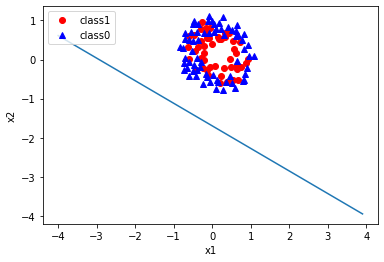

In [30]:
plotBestFit(train_data,weights)

In [ ]:


def costReg(weights,X,y,lamb):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*weights)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*weights)))
    reg = lamb/(2*len(X))*L_2(weights)
    return np.sum(first -second )/len(X)+reg

def gradientReg(weights,X,y,lamb):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)

    parameters=int(weights.ravel().shape[1])
    grad = np.zeros(parameters)
    error= sigmoid(X*weights)-y.T
    for j in range (parameters):
        term = np.multiply(error,X[:,j])

        if (j==0):
            grad[j] = np.sum(term)/len(X)
        else:
            grad[j] = (np.sum(term)/len(X)) + ((lamb/len(X))*weights[:,j])

    return grad


In [ ]:


def plotDataSet(dataMat):
    '''
    输入：从txt文本文件里读取的输入数据
    功能：画出前两个特征的二维图
    输出：散点图
    '''
    x1 = np.mat(dataMat)[:,1]
    x2 = np.mat(dataMat)[:,2]
    line1,= plt.plot(x1[:50],x2[:50],'ro',label = 'class1')
    line2, = plt.plot(x1[50:],x2[50:],'b^',label ='class0')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(handles=[line1,line2],loc = 2)
    plt.show() 

def plotBestFit(dataMat,weights):
    '''
    输入：输入数据,权值矩阵
    功能：画出前两个特征的二维图及分类曲线
    输出：散点图
    '''    
    plt.figure()
    plotDataSet(dataMat)
    x = np.mat(np.arange(-4.0,4.0,0.1))
    y = (-weights[0]-weights[1] * x)/weights[2]
    plt.plot(x.transpose(),y.transpose())
    plt.show()

def logisticTest(weights,testData):
    '''
    输入：权值，测试数据
    功能：利用训练的数据计算测试数据对应的标签
    输出：测试数据的标签
    '''
    n,m = np.shape(np.mat(testData))
    testLabel = np.zeros((n,1))
    for i in range(n):
        testLabel[i] = weights[0]+weights[1]*testData[i][0]+weights[2]*testData[i][1]
        if testLabel[i] >= 0.5: testLabel[i] = 1
        else:  testLabel[i] = 0
    return testLabel

def stoGradAscent(dataMat,labelMat):
    '''
    输入：输入特征矩阵，标签列表
    功能：随机梯度上升算法，更新权重，只用了一遍数据集
    输出：权重向量
    '''
    dataMatrix = np.mat(dataMat)
    n,m = np.shape(dataMatrix)
    alpha = 0.01
    weights =np.mat(np.ones((m,1)))
    for i in range(n):
        predictlabel = sigmoid(dataMatrix[i] * weights)
        error = labelMat[i] - predictlabel
        #计算梯度
        gradient = np.multiply(dataMatrix[i],error)
        #更新权重
        weights = weights + alpha * gradient.transpose()        
    return weights

def improvedStoGradAscent(dataMat,labelMat,numInter = 150):   
    '''
    输入：输入特征矩阵，标签列表,最大迭代次数（决定了所有训练样本被使用多少次）
    功能：改进的随机梯度上升算法，更新权重，随机选取训练样本中的数据
    输出：权重向量
    '''
    dataMatrix = np.mat(dataMat)
    n,m = np.shape(dataMatrix)
    weights =np.mat(np.ones((m,1)))    
    for j in range(numInter):
        dataIndex = range(n)
        for i in range(n):
            #修改学习步长，缓解数据波动,由于常数项的存在，alpha不是严格下降的
            #alpha =  0.01
            alpha = 2/(1.0+j+i) + 0.0001
            #获得随机样本索引
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            predictlabel = sigmoid(dataMatrix[randIndex] * weights)
            error = labelMat[randIndex] - predictlabel
            gradient = np.multiply(dataMatrix[randIndex],error)
            weights = weights + alpha * gradient.transpose()

            del dataIndex[randIndex]
    return weights

if __name__ == '__main__':
    dataMat,labelMat = loadDataSet()
    #plt.figure(1)
    #plotDataSet(dataMat)  
    #------批处理梯度上升算法------
    #weights,error = gradientAscent(dataMat,labelMat)
    #-----随机梯度上升算法---
    #weights = stoGradAscent(dataMat,labelMat)
    #-----改进的随机梯度上升算法---
    weights = improvedStoGradAscent(dataMat,labelMat,numInter = 150)    
    plotBestFit(dataMat,weights)
    testLabel = logisticTest(weights,[[0,0],[0,10]])

In [ ]:
def festure_mapping(x1,x2,degree):
    data = pd.da